# <center> <font color='blue'> Depression Prediction Model</font></center>

### <font color='red'>💻 The machine learning models used in this project are: </font> 
1. Support Vector Machine (SVM)
2. K-Nearest Neighbour (KNN)
3. Logistic Regression
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Neural Network
8. LinearDiscriminantAnalysis
9. Gradient Boosting
10. Ada Boost

<a id="0"></a>
# 📝check list:


#### [1.📚 Importing Libraries](#1)
#### [2.📂 Loading Data](#2)
#### [3.🧐 Data Wrangling](#3)
  #### _🚫 Missing Values
  #### _👁‍🗨 DataTypes
  #### _🔃 Duplicates
#### [ 4.📊 EDA](#4)
  #### _🔢 Numeric Columns
  #### _🔠 Categorical Columns
#### [5.🛠 Feature Engineering ](#5)
  #### _👨🏽‍💻 LabelEncoder 
#### [6.🔭 correlations ](#6)
#### [7.🏗 Model Building](#7)
  #### _ 🗃 Splitting Data
  ####  _Train & Test Models
#### [8.🥇 Saving The Best Model](#8)



<a id="1"></a>
# <font color='green'> 📚 Importing Libraries</font>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="2"></a>
# <font color='green'> 📂  Load Data:</font>

In [2]:
df = pd.read_csv('depression.csv')
df

,Timestamp,Age,Feeling sad,Irritable towards people,Trouble sleeping at night,Problems concentrating or making decision,loss of appetite,Feeling of guilt,Problems of bonding with people,Suicide attempt,Depressed
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Maybe,Sometimes,No,Yes
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Maybe,Yes,No,Yes
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,Yes,No,Not interested to say,No
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,No,No,No,Yes


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="3"></a>
# <font color='green'> 🧐 Data Info:</font>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad                                1503 non-null   object
 3   Irritable towards people                   1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   loss of appetite                           1503 non-null   object
 7   Feeling of guilt                           1494 non-null   object
 8   Problems of bonding with people            1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
 10  Depressed                           

In [3]:
df.dropna(inplace=True)
df.isnull().sum()

Timestamp                                    0
Age                                          0
Feeling sad                                  0
Irritable towards people                     0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
loss of appetite                             0
Feeling of guilt                             0
Problems of bonding with people              0
Suicide attempt                              0
Depressed                                    0
dtype: int64

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="4"></a>
# <font color='green'> 📊 Exploratory Data Analysis (EDA):</font>


### 1-Numeric Columns

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1491.0,2.134138,1.289392,0.0,1.0,2.0,3.0,4.0
Feeling sad,1491.0,1.004024,0.838653,0.0,0.0,1.0,2.0,2.0
Irritable towards people,1491.0,1.033535,0.837992,0.0,0.0,1.0,2.0,2.0
Trouble sleeping at night,1491.0,1.016097,0.756898,0.0,0.0,1.0,2.0,2.0
Problems concentrating or making decision,1491.0,0.900738,0.820586,0.0,0.0,1.0,2.0,2.0
loss of appetite,1491.0,0.668008,0.823588,0.0,0.0,0.0,1.0,2.0
Feeling of guilt,1491.0,0.875252,0.753870,0.0,0.0,1.0,1.0,2.0
Problems of bonding with people,1491.0,0.895372,0.792447,0.0,0.0,1.0,2.0,2.0
Suicide attempt,1491.0,0.832327,0.864700,0.0,0.0,1.0,2.0,2.0
Depressed,1491.0,0.649229,0.477372,0.0,0.0,1.0,1.0,1.0


### Categorical Columns

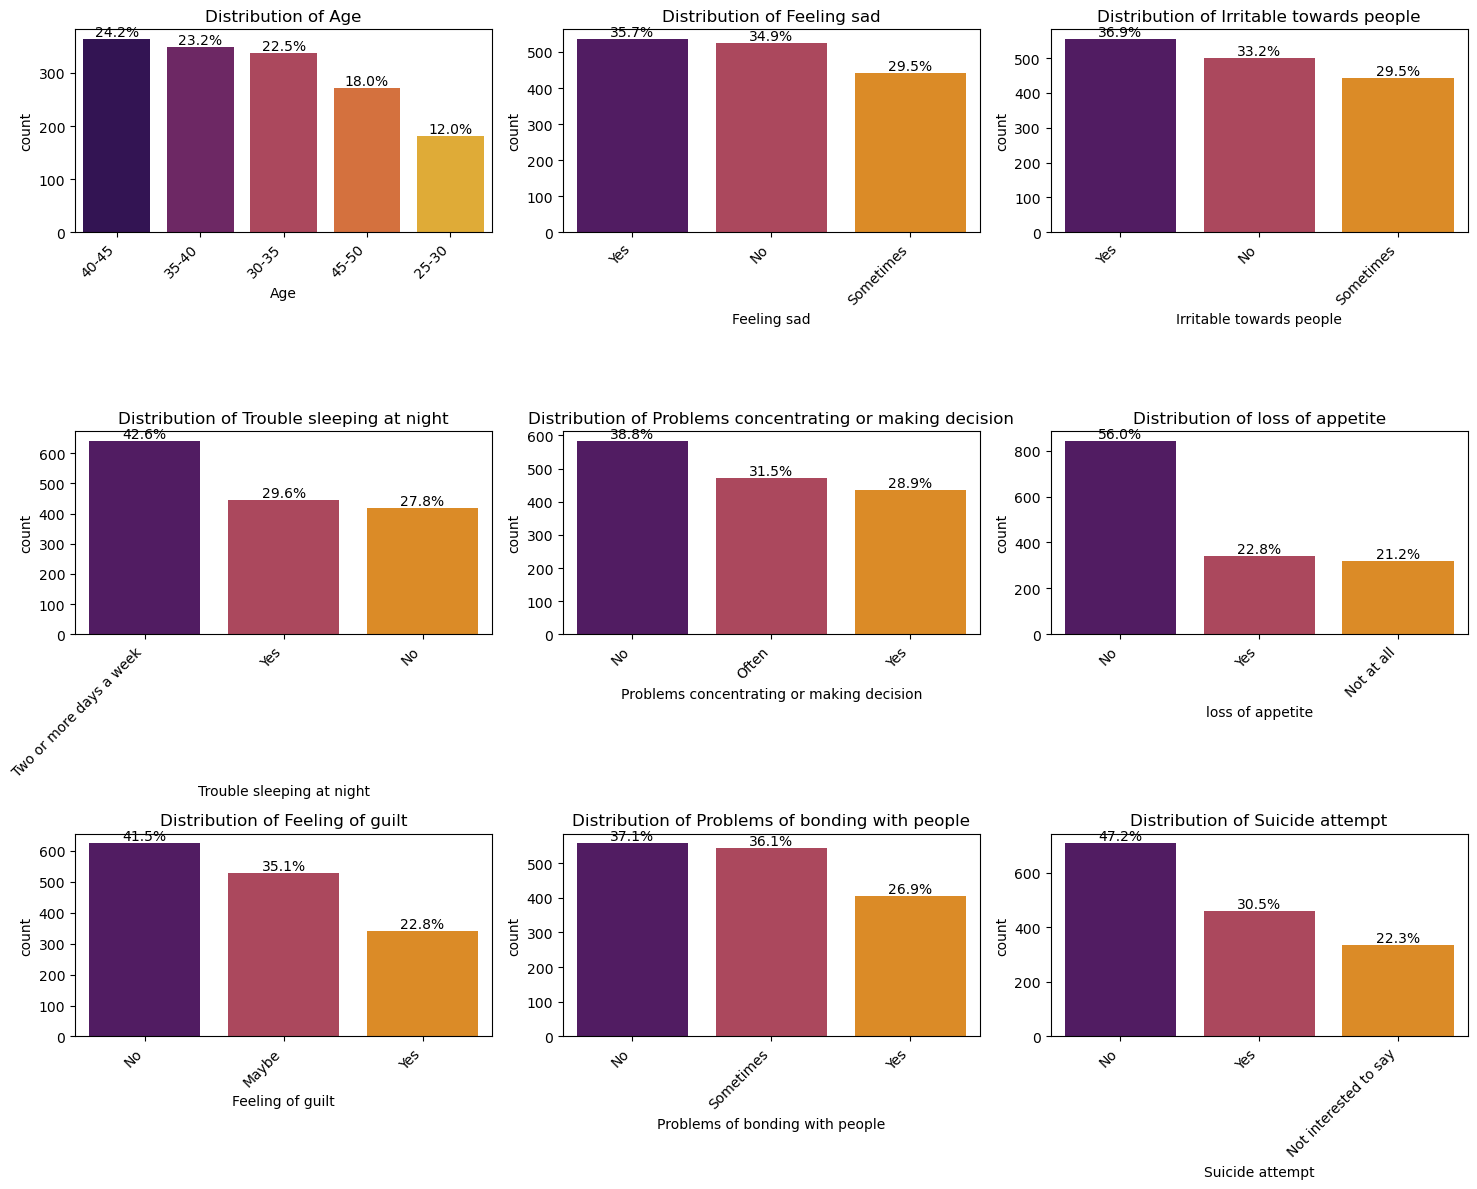

In [6]:
cat_columns = ['Age', 'Feeling sad', 'Irritable towards people', 'Trouble sleeping at night','Problems concentrating or making decision',
            'loss of appetite','Feeling of guilt','Problems of bonding with people','Suicide attempt']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(cat_columns, 1):  
    plt.subplot(3, 3, i)  # 2 rows and 2 columns
    order = df[variable].value_counts().index
    ax = sns.countplot(x=variable, data=df, order=order, palette='inferno')

    # Add percentage annotations
    total = len(df[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()


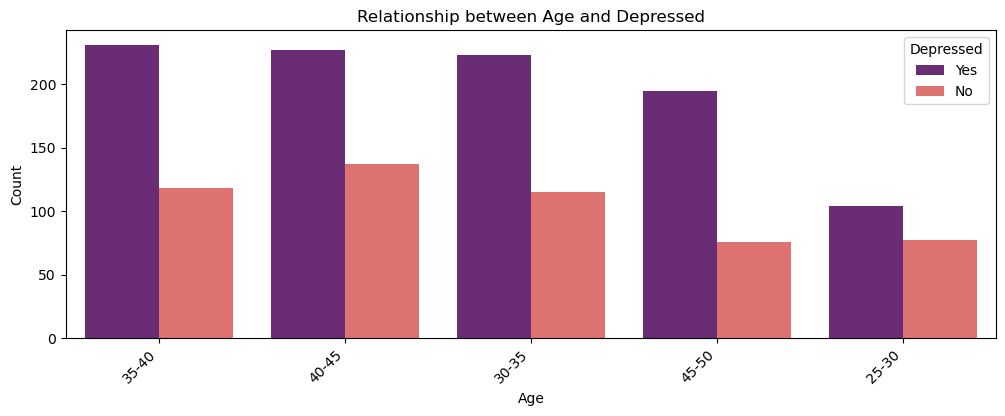

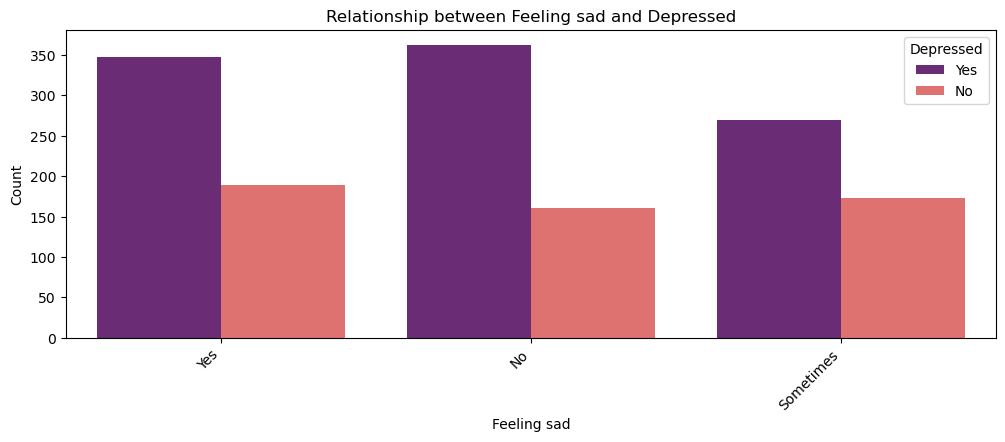

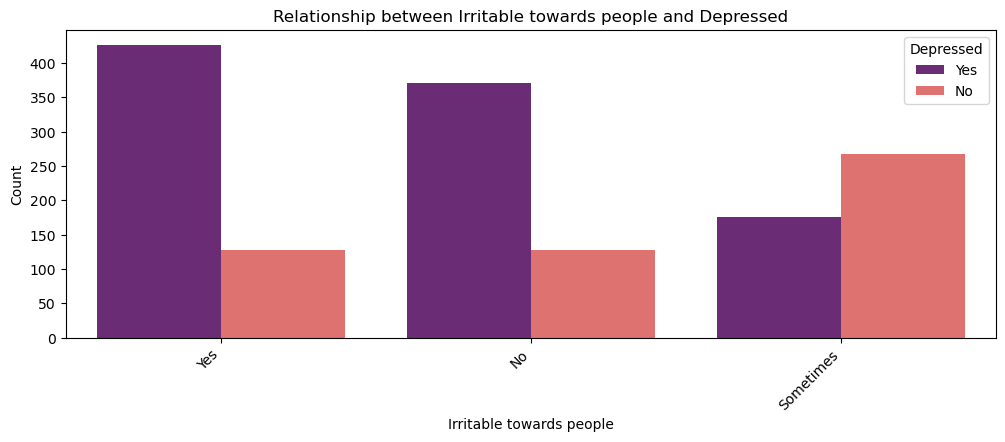

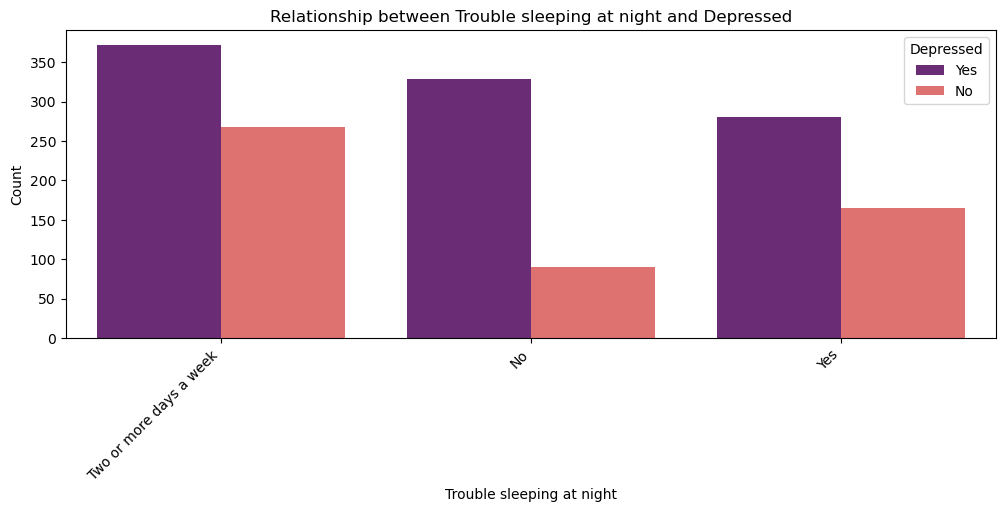

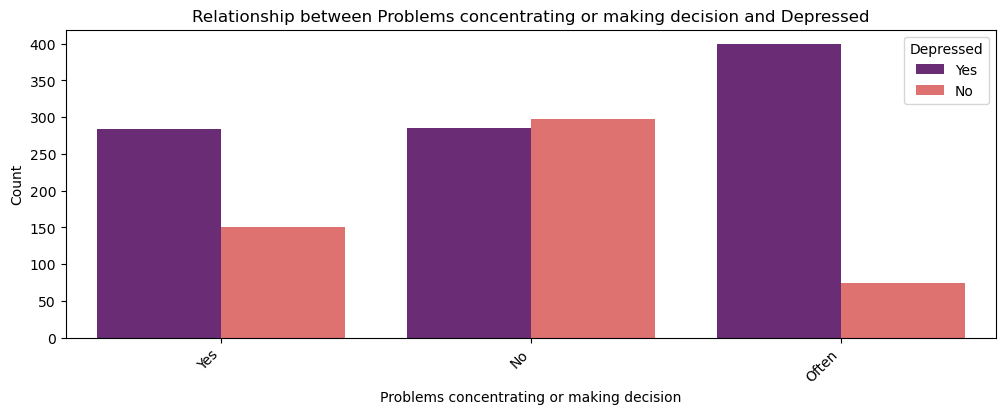

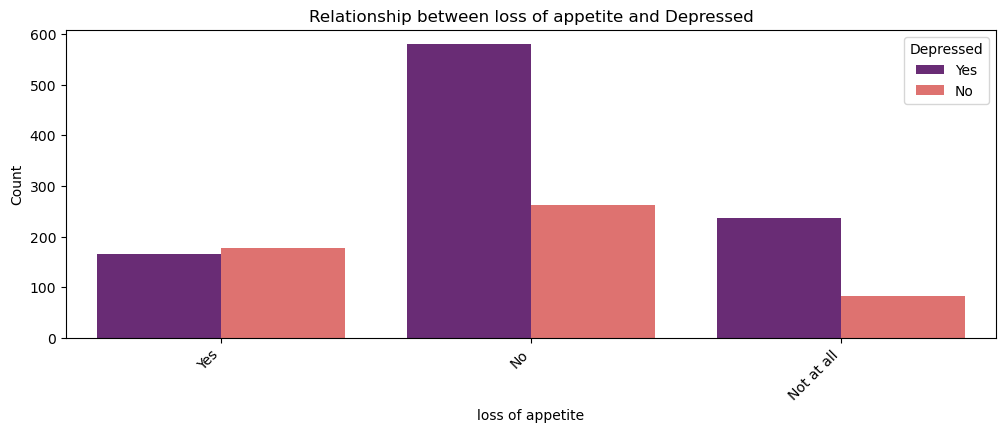

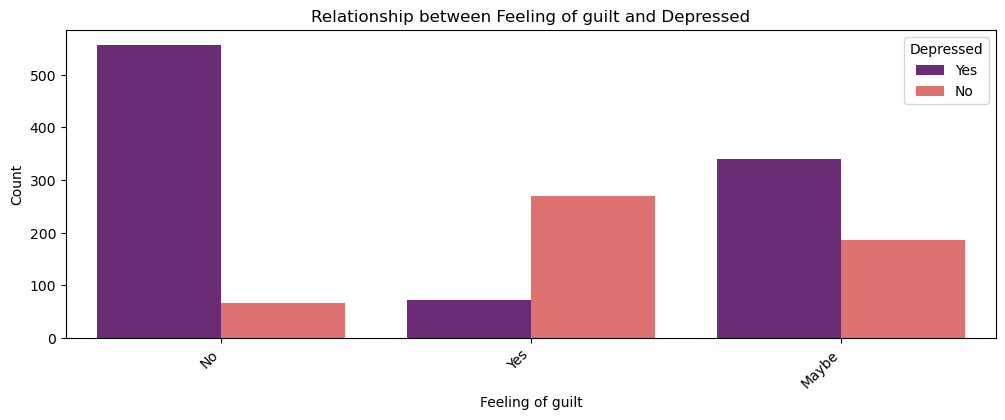

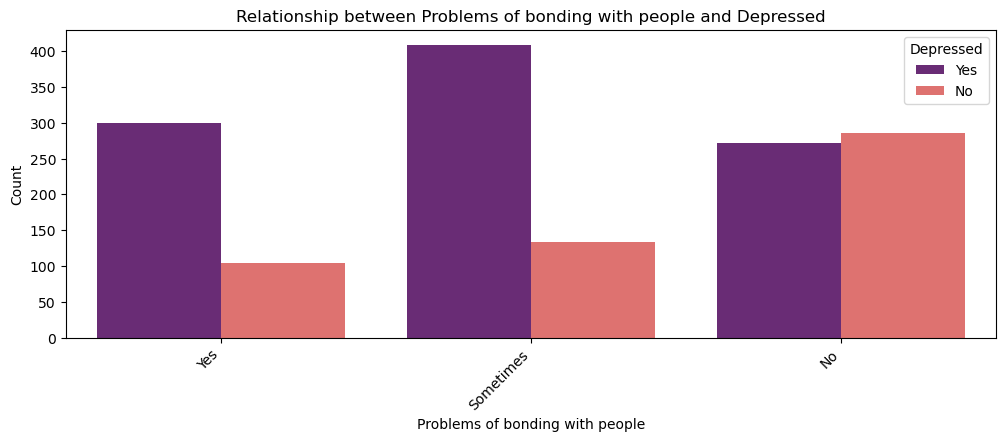

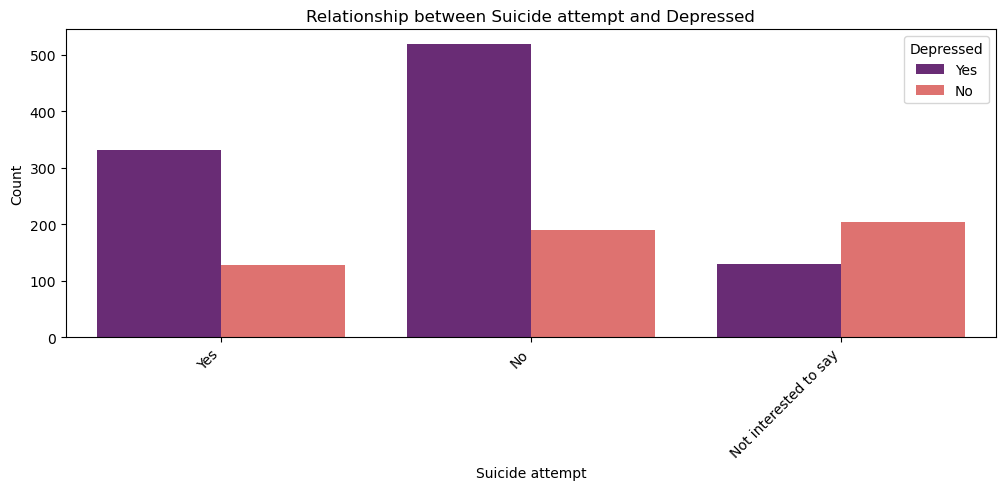

In [7]:
selected_variables =['Age', 'Feeling sad', 'Irritable towards people', 'Trouble sleeping at night','Problems concentrating or making decision',
            'loss of appetite','Feeling of guilt','Problems of bonding with people','Suicide attempt']
disease_conditions = ['Depressed']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=variable, hue=disease, palette='magma')
        plt.title(f'Relationship between {variable} and {disease}')
        plt.xlabel(variable)
        plt.ylabel('Count')
        plt.legend(title=disease, loc='upper right')
        plt.xticks(rotation=45, ha='right')
        plt.show()


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="5"></a>
# <font color='green'> 🛠 Feature Engineering:</font>


In [8]:
dobject= df.select_dtypes(include="object")
dnumeric= df.select_dtypes(exclude='object')

In [9]:
la= LabelEncoder()

In [10]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [12]:
df=pd.concat([dobject,dnumeric],axis=1)
df['Depressed']=df['Depressed'].astype(int)
df['Suicide attempt']=df['Suicide attempt'].astype(int)
df['Age']=df['Age'].astype(int)
df['Feeling sad']=df['Feeling sad'].astype(int)
df['Irritable towards people']=df['Irritable towards people'].astype(int)
df['Trouble sleeping at night']=df['Trouble sleeping at night'].astype(int)
df['Problems concentrating or making decision']=df['Problems concentrating or making decision'].astype(int)
df['loss of appetite']=df['loss of appetite'].astype(int)
df['Feeling of guilt']=df['Feeling of guilt'].astype(int)
df['Problems of bonding with people']=df['Problems of bonding with people'].astype(int)

In [104]:
df.drop('Timestamp',axis=1,inplace=True)

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="6"></a>
# <font color='green'> 🔭 Explore correlations between features:</font>


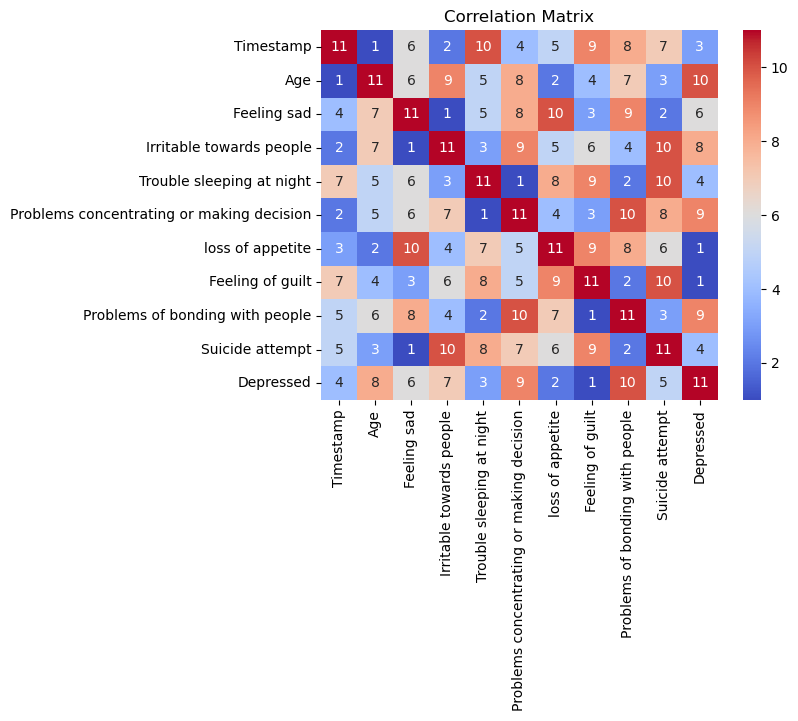

In [32]:
#plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix.rank(axis='columns'), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="7"></a>
# <font color='green'> 🏗 Model Building:</font>

In [105]:
X = df.drop(["Depressed"], axis=1)
y = df["Depressed"]
y

0       1
1       0
2       1
3       1
4       1
       ..
1498    1
1499    1
1500    0
1501    1
1502    0
Name: Depressed, Length: 1491, dtype: int32

In [106]:

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state = 5 )

In [108]:
X_train.shape

(1192, 9)

In [109]:
X_test.shape

(299, 9)

### 1) Support Vector Machine Model :-

In [110]:
svm_model= SVC()

In [111]:
svm_model.fit(X_train, y_train)

SVC()

In [112]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        91
           1       0.96      0.93      0.94       208

    accuracy                           0.92       299
   macro avg       0.90      0.92      0.91       299
weighted avg       0.93      0.92      0.92       299



### 2) K-Nearest Neighbour MODEL :-

In [113]:
knn_model= KNeighborsClassifier()

In [114]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
y_pred= knn_model.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        91
           1       0.95      0.93      0.94       208

    accuracy                           0.92       299
   macro avg       0.90      0.91      0.91       299
weighted avg       0.92      0.92      0.92       299



### 3) Logistic Regression MODEL :-

In [116]:
log_model= LogisticRegression()


In [117]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [118]:
y_pred= log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52        91
           1       0.78      0.89      0.83       208

    accuracy                           0.75       299
   macro avg       0.71      0.66      0.68       299
weighted avg       0.74      0.75      0.74       299



### 4) Naive Bayes MODEL :-

In [119]:
nb_model= GaussianNB()

In [120]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [121]:
y_pred= nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.53      0.61        91
           1       0.82      0.91      0.86       208

    accuracy                           0.80       299
   macro avg       0.77      0.72      0.74       299
weighted avg       0.79      0.80      0.79       299



### 5) Decision Tree MODEL :-

In [122]:
tree_model= tree.DecisionTreeClassifier()

In [123]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
y_pred= tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.99      0.99      0.99       208

    accuracy                           0.99       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.99      0.99      0.99       299



### 6) Random Forest MODEL :-

In [125]:
rf_model= RandomForestClassifier()

In [126]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred= rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.99      1.00       208

    accuracy                           0.99       299
   macro avg       0.99      1.00      0.99       299
weighted avg       0.99      0.99      0.99       299



### 7) Neural Network MODEL :-

In [128]:
nn_model=MLPClassifier()

In [129]:
nn_model.fit(X_train, y_train)

MLPClassifier()

In [130]:
y_pred= nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        91
           1       0.98      0.95      0.97       208

    accuracy                           0.95       299
   macro avg       0.94      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



### 8) Linear Discriminant Analysis MODEL :-

In [131]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [132]:
y_pred= lda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52        91
           1       0.78      0.89      0.83       208

    accuracy                           0.75       299
   macro avg       0.71      0.66      0.68       299
weighted avg       0.74      0.75      0.74       299



### 9) Gradient Boosting Classifier MODEL :-

In [133]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [134]:
y_pred= gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        91
           1       0.97      0.96      0.96       208

    accuracy                           0.95       299
   macro avg       0.93      0.94      0.94       299
weighted avg       0.95      0.95      0.95       299



### 10) Ada Boost Classifier MODEL :-

In [135]:
ad_model=AdaBoostClassifier()
ad_model.fit(X_train, y_train)

AdaBoostClassifier()

In [136]:
y_pred= ad_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72        91
           1       0.87      0.89      0.88       208

    accuracy                           0.83       299
   macro avg       0.81      0.79      0.80       299
weighted avg       0.83      0.83      0.83       299



<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="8"></a>
# <font color='green'> 🥇 BEST MODEL:</font>

#### As we can see Random Forest Model Gives us a better accuracy.

# Save Model :

In [137]:
f_name='depression_disease.sav'

In [138]:
pickle.dump(rf_model,open(f_name,'wb'))
print("model saved!!!")

model saved!!!
